# Aula 2 - Jornada Quant

## Modelos de Otimização

O que significam os modelos de otimização de portfólio?

Os modelos de otimização de portfólio são instrumentos analíticos que auxiliam os investidores na tomada de decisões sobre como distribuir seus recursos financeiros entre diversos ativos, como ações, títulos, fundos mútuos, entre outros, com o intuito de maximizar o retorno esperado para um determinado nível de risco ou minimizar o risco para um nível específico de retorno.

A finalidade primordial desses modelos é desenvolver um portfólio que harmonize os diferentes ativos de modo a alcançar os objetivos do investidor, levando em consideração suas preferências quanto ao risco e retorno.

É relevante observar que, embora esses modelos ofereçam perspicácias valiosas, estão sujeitos a algumas limitações, como a pressuposição de que os retornos passados são indicativos dos retornos futuros, a sensibilidade às estimativas de parâmetros e a suposição de uma distribuição normal dos retornos. Os investidores devem estar cientes dessas limitações ao empregar modelos de otimização de portfólio e ponderar informações adicionais ao tomar decisões de investimento.


### Instalando biblioteca Riskfolio

Criada por Dany Cajas
https://riskfolio-lib.readthedocs.io/en/latest/ 


In [1]:
#Pegando a versão mais recente do Matplotlib, mas essa etapa eu realizei no Anaconda Prompt
!pip uninstall matplotlib
!pip install matplotlib

# Instala a biblioteca 'pybind11'
!pip install pybind11

A sua utilização é comum em projetos que envolvem a integração de código C++ com Python, principalmente em situações em que o desempenho é crítico e você deseja tirar proveito de bibliotecas em C++ já existentes.

In [2]:
# Instalação da biblioteca 'riskfolio-lib' usando o pip
!pip install riskfolio-lib

     ------------------------------------- 248.1/248.1 kB 14.9 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 33.1 MB/s eta 0:00:00
     ------------------------------------- 925.0/925.0 kB 57.2 MB/s eta 0:00:00
     ---------------------------------------- 355.1/355.1 kB ? eta 0:00:00
     ---------------------------------------- 8.4/8.4 MB 33.6 MB/s eta 0:00:00
     ---------------------------------------- 72.0/72.0 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 292.9/292.9 kB ? eta 0:00:00
     ---------------------------------------- 85.1/85.1 kB ? eta 0:00:00


Este comando faz o download e a instalação da biblioteca riskfolio-lib no ambiente Python atual. riskfolio-lib é uma biblioteca específica para o gerenciamento de risco em finanças. Ela pode conter funções e ferramentas relacionadas à otimização de portfólios, análise de risco, entre outras funcionalidades comumente utilizadas em finanças quantitativas. A instalação é necessária para que você possa utilizar os recursos dessa biblioteca em seus projetos.

In [1]:
# Importa a biblioteca 'riskfolio' com o alias 'rp'
import riskfolio as rp

# Importa a biblioteca 'pandas' com o alias 'pd'
import pandas as pd

# Importa a biblioteca 'numpy' com o alias 'np'
import numpy as np

# Importa a biblioteca 'yfinance' com o alias 'yf'
import yfinance as yf

- "import riskfolio as rp" : Importa a biblioteca riskfolio e a associa ao alias rp. O alias permite que você use rp como prefixo para chamar funções e objetos da biblioteca.

- "import pandas as pd": Importa a biblioteca pandas e a associa ao alias pd. O pd é um alias comum utilizado pela comunidade para facilitar a referência a funções da biblioteca pandas.

- "import numpy as np": Importa a biblioteca numpy e a associa ao alias np. Similar ao alias pd, np é frequentemente utilizado como um atalho para funções da biblioteca numpy.

- "import yfinance as yf": Importa a biblioteca yfinance e a associa ao alias yf. O yf é um alias que permite acessar as funções dessa biblioteca utilizando yf como prefixo. A biblioteca yfinance é comumente usada para obter dados financeiros de mercado, como preços de ações, usando a API do Yahoo Finance.

In [3]:
# Parâmetros
# Data
inicio = '2023-01-01'
fim = '2023-09-30'

# Seleção dos Ativos
ativos = ['CORR3.SA', 'ODPV3.SA', 'CXSE3.SA', 'BRAP3.SA', 'CEBR3.SA', 'PSSA3.SA','ITUB3.SA', 'PINE3.SA', 'BSLI3.SA', 'LIPR3.SA']

In [4]:
# Extrai os dados de preço das ações especificadas no vetor 'ativos'
# Utiliza a biblioteca 'yfinance' para baixar os preços ajustados de fechamento ('Adj Close') no intervalo de datas especificado
# Os dados são armazenados no DataFrame 'carteira'
carteira = yf.download(ativos, start=inicio, end=fim)['Adj Close']

# Exibe as primeiras linhas do DataFrame 'carteira' para visualização
carteira.head()

[*********************100%%**********************]  10 of 10 completed


,BRAP3.SA,BSLI3.SA,CEBR3.SA,CORR3.SA,CXSE3.SA,ITUB3.SA,LIPR3.SA,ODPV3.SA,PINE3.SA,PSSA3.SA
Date,,,,,,,,,,
2023-01-02,23.200214,17.829292,8.369677,NaN,7.369959,20.326000,67.601791,8.737601,8.484674,21.537760
2023-01-03,22.844248,17.829292,8.361390,-62.866875,7.342730,19.937485,67.601791,8.541030,8.484674,21.128693
2023-01-04,23.244711,17.829292,8.145933,-62.866875,7.397188,19.956434,67.601791,8.541030,8.484674,21.195288
2023-01-05,23.645174,17.759958,8.659715,-62.866875,7.351807,20.543949,67.601791,8.550858,8.484674,21.404573
2023-01-06,24.152428,17.759958,8.527126,-62.866875,7.315501,20.809273,67.601791,9.140574,8.484674,21.689968


Essas linhas de código estão utilizando a biblioteca yfinance para baixar os preços ajustados de fechamento ('Adj Close') de um conjunto de ativos financeiros especificados no vetor ativos. Os dados são baixados no intervalo de datas definido pelos parâmetros inicio e fim. Os preços ajustados de fechamento são comumente utilizados em análises financeiras, especialmente para calcular retornos ajustados para eventos como dividendos ou desdobramentos.

In [5]:
# Calcula os retornos percentuais diários dos ativos presentes no DataFrame 'carteira'
# Utiliza o método 'pct_change()' que calcula a variação percentual entre os preços ajustados de fechamento em períodos consecutivos
# O método 'dropna()' é utilizado para remover qualquer valor NaN que possa ser gerado pelo cálculo
retornos = carteira.pct_change().dropna()

# Exibe os retornos calculados no DataFrame 'retornos'
retornos

,BRAP3.SA,BSLI3.SA,CEBR3.SA,CORR3.SA,CXSE3.SA,ITUB3.SA,LIPR3.SA,ODPV3.SA,PINE3.SA,PSSA3.SA
Date,,,,,,,,,,
2023-01-04,0.017530,0.000000,-0.025768,0.0,0.007417,0.000950,0.000000,0.000000,0.0,0.003152
2023-01-05,0.017228,-0.003889,0.063072,0.0,-0.006135,0.029440,0.000000,0.001151,0.0,0.009874
2023-01-06,0.021453,0.000000,-0.015311,0.0,-0.004938,0.012915,0.000000,0.068966,0.0,0.013333
2023-01-09,0.016581,0.000000,0.039844,0.0,0.007444,0.002732,0.000000,-0.018280,0.0,0.009211
2023-01-10,0.014860,0.000000,0.028037,0.0,0.003695,0.015895,0.000000,0.046002,0.0,0.023033
...,...,...,...,...,...,...,...,...,...,...
2023-09-25,-0.014833,0.066897,0.000000,0.0,0.017905,0.003934,0.000000,0.014157,0.0,0.003698
2023-09-26,-0.008742,-0.107951,-0.008029,0.0,-0.019349,-0.012190,0.000000,-0.009769,0.0,-0.012159
2023-09-27,-0.008329,-0.014493,0.000736,0.0,-0.013453,-0.000881,-0.150000,-0.057399,0.0,-0.011563


Essas linhas de código estão sendo usadas para calcular os retornos percentuais diários dos ativos presentes no DataFrame carteira. O método .pct_change() é aplicado a cada coluna do DataFrame carteira, calculando a variação percentual entre os preços ajustados de fechamento em períodos consecutivos.

O método .dropna() é então utilizado para remover qualquer linha que contenha valores NaN resultantes do cálculo de variação percentual.

O resultado final é armazenado no DataFrame retornos, que contém os retornos percentuais diários dos ativos. O DataFrame retornos é exibido para visualização. Esses retornos são frequentemente utilizados em análises financeiras para avaliar o desempenho histórico dos ativos.







In [6]:
# Calcula a matriz de covariância dos retornos dos ativos presentes no DataFrame 'retornos'
covariancia_retornos = retornos.cov()

# Exibe a matriz de covariância resultante
covariancia_retornos

,BRAP3.SA,BSLI3.SA,CEBR3.SA,CORR3.SA,CXSE3.SA,ITUB3.SA,LIPR3.SA,ODPV3.SA,PINE3.SA,PSSA3.SA
BRAP3.SA,0.000268,7.469316e-05,0.000022,0.000040,0.000026,0.000079,0.000016,0.000057,1.588404e-04,0.000023
BSLI3.SA,0.000075,9.617314e-04,0.000007,-0.000510,0.000011,0.000017,0.000098,-0.000105,6.157013e-07,0.000022
CEBR3.SA,0.000022,7.427998e-06,0.000352,0.000030,0.000013,0.000047,-0.000003,-0.000016,-7.229449e-06,0.000029
CORR3.SA,0.000040,-5.099870e-04,0.000030,0.007625,0.000033,0.000114,0.000003,0.000103,3.477577e-05,-0.000072
CXSE3.SA,0.000026,1.144349e-05,0.000013,0.000033,0.000159,0.000070,-0.000025,0.000048,-7.269304e-05,0.000059
ITUB3.SA,0.000079,1.708127e-05,0.000047,0.000114,0.000070,0.000180,-0.000004,0.000080,3.075551e-05,0.000076
LIPR3.SA,0.000016,9.790361e-05,-0.000003,0.000003,-0.000025,-0.000004,0.000710,0.000022,-2.667610e-06,-0.000011
ODPV3.SA,0.000057,-1.054319e-04,-0.000016,0.000103,0.000048,0.000080,0.000022,0.000595,-5.544787e-04,0.000056
PINE3.SA,0.000159,6.157013e-07,-0.000007,0.000035,-0.000073,0.000031,-0.000003,-0.000554,2.070796e-02,0.000034
PSSA3.SA,0.000023,2.229290e-05,0.000029,-0.000072,0.000059,0.000076,-0.000011,0.000056,3.431157e-05,0.000229


Essa linha de código utiliza o método .cov() para calcular a matriz de covariância dos retornos dos ativos presentes no DataFrame retornos. A covariância é uma medida estatística que expressa a relação linear entre duas variáveis.

O resultado, armazenado na variável covariancia_retornos, é uma matriz simétrica que fornece as covariâncias entre pares de ativos. Cada elemento da matriz representa a covariância entre os retornos de dois ativos.

Exibindo covariancia_retornos, você pode analisar como os retornos dos diferentes ativos estão relacionados entre si em termos de variabilidade conjunta. A covariância é uma parte fundamental na construção de modelos de otimização de portfólio, pois ajuda a entender como diferentes ativos se movem em relação uns aos outros.

### Modelo de otimização - Markowitz MAX SHARPE

O Modelo de Otimização de Markowitz é uma abordagem que busca construir portfólios de investimento eficientes, equilibrando retorno e risco. O processo envolve a diversificação de ativos com base em seus retornos e correlações. O objetivo é encontrar o portfólio que oferece o melhor equilíbrio entre retorno e risco, conhecido como portfólio de Sharpe máximo, maximizando o Índice de Sharpe. Essa abordagem é fundamental na Teoria Moderna de Portfólio e influenciou significativamente a gestão de investimentos.

Sharpe Ratio = (Retorno Esperado - Taxa Livre de Risco) / Volatilidade da Carteira

In [7]:
# Cria um objeto Portfolio da biblioteca riskfolio usando os retornos diários
portfolio = rp.Portfolio(returns=retornos)

# Define os métodos de estimativa de retornos ('mu') e matriz de covariância ('cov') como históricos
mu = 'hist'  # Estimação dos retornos com base no histórico
cov = 'hist'  # Estimação da matriz de covariância através do histórico

# Calcula estatísticas dos ativos no portfólio, como média, desvio padrão, e outros
portfolio.assets_stats(method_mu=mu, method_cov=cov, d=0.94)

# Configuração do modelo de otimização
model = 'Classic'  # Utiliza o modelo clássico de otimização
rm = 'MV'  # Utiliza o método de risco mínimo-variância
obj = 'Sharpe'  # Objetivo de maximizar o índice de Sharpe
hist = True  # Utiliza dados históricos para otimização
rf = 0  # Taxa livre de risco (0 para ser mais fiel ao CDI diário)
l = 0  # Parâmetro de regularização (lambda)

# Realiza a otimização do portfólio
w = portfolio.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

# Exibe as ponderações ótimas para cada ativo no portfólio otimizado
display(w.T)

,BRAP3.SA,BSLI3.SA,CEBR3.SA,CORR3.SA,CXSE3.SA,ITUB3.SA,LIPR3.SA,ODPV3.SA,PINE3.SA,PSSA3.SA
weights,1.800547e-10,2.344462e-10,0.283559,3.360392e-11,0.527423,4.184075e-10,0.049914,0.09117,0.015732,0.032201


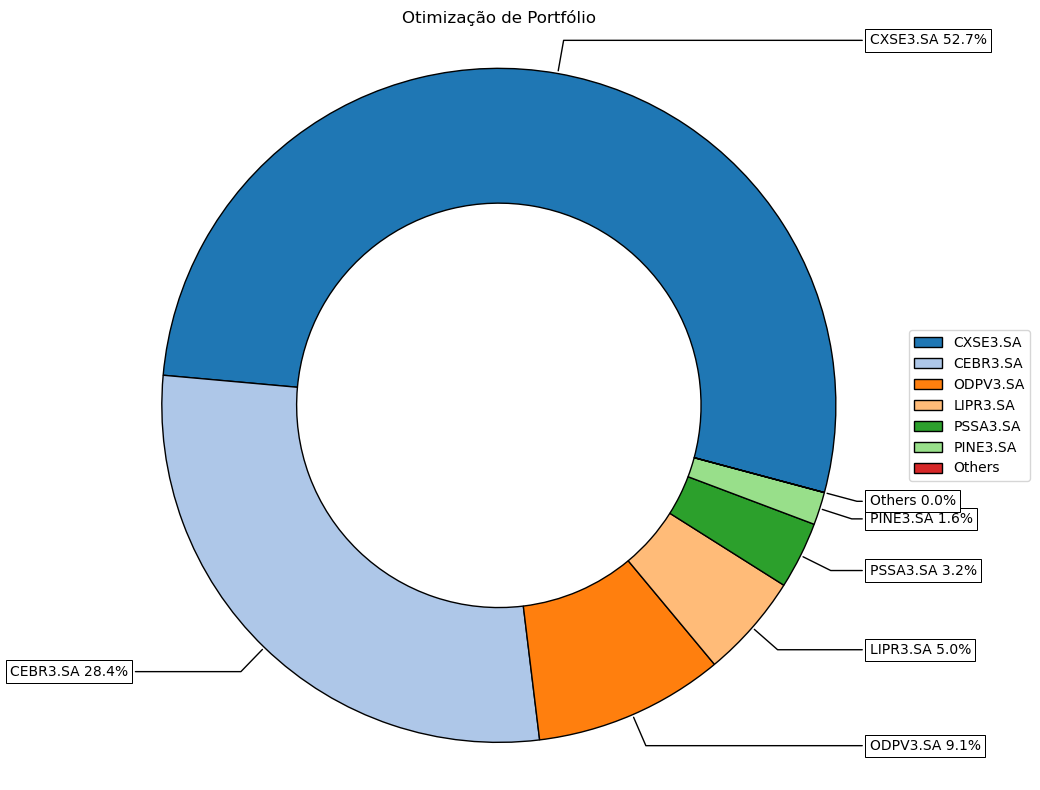

In [8]:
# Gera um gráfico de pizza (pie chart) representando as ponderações ótimas do portfólio
ax = rp.plot_pie(w=w, 
                 title='Otimização de Portfólio',  # Título do gráfico
                 others=0.01,  # Agrupa ativos com peso inferior a 1% como 'Outros'
                 nrow=25,  # Número de linhas no gráfico
                 cmap='tab20',  # Esquema de cores (colormap)
                 height=8, width=10,  # Altura e largura do gráfico
                 ax=None)  # Eixo onde o gráfico será desenhado (se None, cria uma nova figura)